# K-Nearest Neighbors Algorithm 

K-Nearest Neighbors (KNN) is  lazy learning algorithm and classification algorithms. In addition, KNN is the simplest methods in machine learning. KNN is used for to separated into classes to predict the classification for new point. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# Only keep close columns 
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [4]:
dataset['Up_Down'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'], 1, -1)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Up/Down
Date,,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400,1
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,-1
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,-1


Step 1: Preprocessing

In [14]:
X = dataset.iloc[ : , 1:4].values
y = dataset.iloc[ : , 6].values

Step 2: Train Test Split

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(937, 3)
(937,)
(235, 3)
(235,)


Step 3: Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

Step 4: Training and Predictions

In [18]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
y_pred = knn.predict(X_test)

Step 5: Evaluating the Algorithm

In [20]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[59 57]
 [61 58]]
             precision    recall  f1-score   support

         -1       0.49      0.51      0.50       116
          1       0.50      0.49      0.50       119

avg / total       0.50      0.50      0.50       235



In [21]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

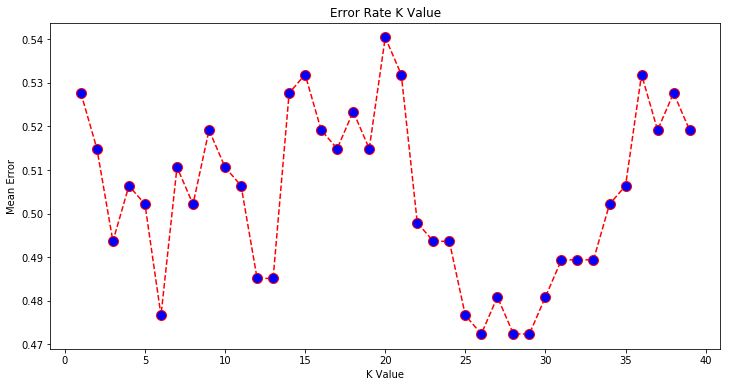

In [22]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [25]:
from sklearn.metrics import accuracy_score

for K in range(40):
    K_value = K+1
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  47.23404255319149 % for K-Value: 1
Accuracy is  48.51063829787234 % for K-Value: 2
Accuracy is  50.638297872340424 % for K-Value: 3
Accuracy is  49.361702127659576 % for K-Value: 4
Accuracy is  49.787234042553195 % for K-Value: 5
Accuracy is  52.34042553191489 % for K-Value: 6
Accuracy is  48.93617021276596 % for K-Value: 7
Accuracy is  49.787234042553195 % for K-Value: 8
Accuracy is  48.08510638297872 % for K-Value: 9
Accuracy is  48.93617021276596 % for K-Value: 10
Accuracy is  49.361702127659576 % for K-Value: 11
Accuracy is  51.48936170212765 % for K-Value: 12
Accuracy is  51.48936170212765 % for K-Value: 13
Accuracy is  47.23404255319149 % for K-Value: 14
Accuracy is  46.808510638297875 % for K-Value: 15
Accuracy is  48.08510638297872 % for K-Value: 16
Accuracy is  48.51063829787234 % for K-Value: 17
Accuracy is  47.65957446808511 % for K-Value: 18
Accuracy is  48.51063829787234 % for K-Value: 19
Accuracy is  45.95744680851064 % for K-Value: 20
Accuracy is  46.8085106